<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Özlem Salehi (<a href="http://qworld.lu.lv/index.php/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h1> <font color="blue"> Solutions </font> for Implementation of Classical Gates Using Quantum Circuits </h1>

<a id="task2"></a>
<h3> Task 2 </h3> 

Complete the following table that corresponds to reversible $AND$ gate, where $\ket{x_1}$ and $\ket{x_2}$ are the inputs of the $AND$ gate and the $\ket{y} =0$ is the output. Which three-qubit quantum gate can we use to implement the $AND$ operator in a reversible manner? 

<h3>Solution</h3>

$
AND: \begin{array}{ccc|ccc} 
    \mathbf{In}  &             &            &\mathbf{Out} &             &          \\
    \hline \mathbf{In} & \mathbf{In}& \mathbf{In} & \mathbf{Out}& \mathbf{Out}& \mathbf{Out} \\ 
    \hline 0 & 0 & 0 & 0 & 0 & 0 \\ 
    \hline 0 & 1 & 0 & 0 & 1 & 0 \\ 
    \hline 1 & 0 & 0 & 1 & 0 & 0 \\
    \hline 1 & 1 & 0 & 1 & 1 & 1 \\ 
    \end{array}
    $
    
We can use CCNOT (Toffoli) gate.

<a id="task3"></a>
<h3> Task 3 </h3> 

Design a quantum (reversible) circuit for implementing $OR$ gate. Test your circuit on all possible two bit inputs. Measure only the output qubit.

<h3>Solution</h3>

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

for input in ['00','01','10','11']:
    
    mycircuit1 = QuantumCircuit(3,1)
    
    #Initialization - Note qiskit order
    if input[0] == '1':
        mycircuit1.x(1)
    if input[1] == '1':
        mycircuit1.x(0)

    mycircuit1.cx(0,2)
    mycircuit1.cx(1,2)
    mycircuit1.ccx(0,1,2)

    mycircuit1.measure(2,0)

    job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(mycircuit1)
    print("Input:", input, "Output:", counts)

Input: 00 Output: {'0': 1000}
Input: 01 Output: {'1': 1000}
Input: 10 Output: {'1': 1000}
Input: 11 Output: {'1': 1000}


<a id="task4"></a>
<h3>Task 4 </h3>

Fredkin gate is a three qubit controlled swap gate which swaps the second and third qubits if the first qubit is in state $ \ket{1} $. It is represented with the following matrix. 

<img src="../images/fredkin.png" width="20%" align="center">

Create a method named `fredkin` and implement Fredkin gate using $CNOT$ and $CCNOT$ operators. Use unitary simulator to check the unitary matrix corresponding to your circuit. (Follow the Qiskit order.)

<h3> Solution </h3>

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

def fredkin(): # Applies fredkin gate to the input using CX and CCX gates.    
    circuit = QuantumCircuit(3)
    circuit.cx(0,1)
    circuit.ccx(2,1,0)
    circuit.cx(0,1)
    return circuit

[[1.  0.  0.  0.  0.  0.  0.  0.]
 [0.  1.  0.  0.  0.  0.  0.  0.]
 [0.  0.  1.  0.  0.  0.  0.  0.]
 [0.  0.  0.  1.  0.  0.  0.  0.]
 [0.  0.  0.  0.  1.  0.  0.  0.]
 [0.  0.  0.  0.  0.  0.  1.  0.]
 [0.  0.  0.  0.  0.  1.  0.  0.]
 [0.  0.  0.  0.  0.  0.  0.  1.]]


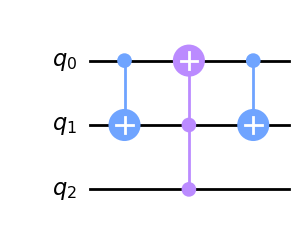

In [3]:
import numpy as np

circuit = fredkin()

job = execute(circuit,Aer.get_backend('unitary_simulator'),shots=1)
u=job.result().get_unitary(circuit,decimals=3).data

print(np.array2string(u.real, precision=1, separator='  '))
circuit.draw(output="mpl")

<a id="task5"></a>
<h3> Task 5</h3>

Prove that $U_f$ is reversible, by showing that given $x$ and $y \oplus f(x)$, $y$ can be computed.

_Hint: Use the fact that $x \oplus x = 0$ for any bit x and $\oplus$ operation is associative._

<h3> Solution </h3>

$(y \oplus f(x)) \oplus f(x) = y \oplus (f(x) \oplus f(x)) = y \oplus 0 = y.$

The first equality follows by associativity and the second equality follows by the property of XOR operation.

<a id="task6"></a>
<h3> Task 6</h3>

After applying the operator $U_f$, what is the new state of the output qubit $\ket{y}$ in terms of $f(x)$ if initially:

- $\ket{y} = \ket{0}$

- $\ket{y} = \ket{1}$

- $\ket{y} = \ket{-}$

<h3> Solution </h3>

- If $\ket{y}$ is $\ket{0}$, output is $ f(x)$

- If $\ket{y}$  is $\ket{1}$, output is negation of $f(x)$

- If $\ket{y}$  is $\ket{-}$, check the next notebook.